## Importing Libraries

In [1]:
import os
from google.colab import drive # either use file off the drive
from google.colab import files # or upload the file to use temporarily

## Mounting Colab Notebooks Folder on Google Drive

In [2]:
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks')
# os.path.exists('/content/drive/My Drive/Colab Notebooks')

## Uploading Files

In [3]:
upload = files.upload()

Saving Volve_Production_Data.xlsx to Volve_Production_Data.xlsx


## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

## Importing and Cleaning Data + Visualization

In [5]:
all_data = pd.read_excel('Volve_Production_Data.xlsx')
all_data

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.07776,0.22879,0.01862,0.0,0.0,0.0,NaN,production,OP
15630,2016-09-15,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.08545,0.22914,0.00631,0.0,0.0,0.0,NaN,production,OP
15631,2016-09-16,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.08544,0.22896,0.01181,0.0,0.0,0.0,NaN,production,OP
15632,2016-09-17,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.07497,0.22846,0.02576,0.0,0.0,0.0,NaN,production,OP


In [6]:
column_names = all_data.columns
column_names

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [7]:
all_data = all_data[(all_data['FLOW_KIND'] == 'production')][['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']]
all_data = all_data.sort_values(by = ['NPD_WELL_BORE_NAME', 'DATEPRD'])
all_data

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2014-04-07,15/9-F-1 C,0.0,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.00000,1.003059,0.00000,0.00000,0.00000,0.0,0.0,0.0
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.00000,0.979008,0.00000,0.00000,0.00000,0.0,0.0,0.0
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.00000,0.545759,0.00000,0.00000,0.00000,0.0,0.0,0.0
4,2014-04-11,15/9-F-1 C,0.0,310.37614,96.87589,277.27826,0.00000,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15628,2016-09-13,15/9-F-5,0.0,NaN,NaN,NaN,0.28463,0.673718,0.08545,0.22889,0.03741,0.0,0.0,0.0
15629,2016-09-14,15/9-F-5,0.0,NaN,NaN,NaN,0.27272,0.636088,0.07776,0.22879,0.01862,0.0,0.0,0.0
15630,2016-09-15,15/9-F-5,0.0,NaN,NaN,NaN,0.28686,0.670794,0.08545,0.22914,0.00631,0.0,0.0,0.0
15631,2016-09-16,15/9-F-5,0.0,NaN,NaN,NaN,0.28604,0.664393,0.08544,0.22896,0.01181,0.0,0.0,0.0


In [8]:
well_names = all_data['NPD_WELL_BORE_NAME'].value_counts()
well_names

,count
NPD_WELL_BORE_NAME,
15/9-F-12,3056
15/9-F-14,3056
15/9-F-11,1165
15/9-F-15 D,978
15/9-F-1 C,746
15/9-F-5,160


In [9]:
start_dates = all_data.groupby('NPD_WELL_BORE_NAME')['DATEPRD'].min().sort_values()
start_dates

,DATEPRD
NPD_WELL_BORE_NAME,
15/9-F-12,2008-02-12
15/9-F-14,2008-02-12
15/9-F-11,2013-07-08
15/9-F-15 D,2014-01-12
15/9-F-1 C,2014-04-07
15/9-F-5,2016-04-11


In [10]:
# all production data is being included, except for 15/9-F-5 becuase it started production last and will be used in an exercise later
data = all_data[(all_data['NPD_WELL_BORE_NAME'] != '15/9-F-5')][['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL','BORE_GAS_VOL', 'BORE_WAT_VOL']]

In [11]:
null_values_by_well = data[data.isnull().any(axis=1)]
null_values_by_well = null_values_by_well.groupby('NPD_WELL_BORE_NAME').apply(lambda x: x.isnull().sum().sum()).sort_values()
null_values_by_well

<ipython-input-11-8175e5be45c4>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_values_by_well = null_values_by_well.groupby('NPD_WELL_BORE_NAME').apply(lambda x: x.isnull().sum().sum()).sort_values()


,0
NPD_WELL_BORE_NAME,
15/9-F-11,44
15/9-F-12,75
15/9-F-14,737
15/9-F-1 C,738


In [12]:
null_values = data.isnull().sum()
null_values

,0
DATEPRD,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,21
AVG_DOWNHOLE_TEMPERATURE,21
AVG_DP_TUBING,21
AVG_ANNULUS_PRESS,1271
AVG_CHOKE_SIZE_P,242
AVG_WHP_P,6
AVG_WHT_P,6


In [13]:
# data = data.dropna() # quick and dirty - suitable if selecting well bores with few null values, but other approaches would be more suitable if columns are missing too many values

columns_to_interpolate = ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']

def interpolation(group):
    for col in columns_to_interpolate:
        group[col] = group[col].interpolate(method='linear', order=2, limit_direction='both') # applying interpolation to fill in any missing values
    return group

data = data.groupby('NPD_WELL_BORE_NAME').apply(interpolation)

# verifying no empty cells in dataframe
null_values_after_interpolation = data.isnull().sum()
null_values_after_interpolation

<ipython-input-13-90f19bda5896>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('NPD_WELL_BORE_NAME').apply(interpolation)


,0
DATEPRD,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,0
AVG_DOWNHOLE_TEMPERATURE,0
AVG_DP_TUBING,0
AVG_ANNULUS_PRESS,0
AVG_CHOKE_SIZE_P,0
AVG_WHP_P,0
AVG_WHT_P,0


In [14]:
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
DATEPRD,9001,2013-05-01 08:30:39.795578368,2008-02-12 00:00:00,2011-03-28 00:00:00,2014-02-22 00:00:00,2015-05-27 00:00:00,2016-09-17 00:00:00,NaN
ON_STREAM_HRS,9001.0,20.196903,0.0,24.0,24.0,24.0,25.0,8.266102
AVG_DOWNHOLE_PRESSURE,9001.0,181.800635,0.0,0.0,232.949281,255.380762,397.58855,109.683291
AVG_DOWNHOLE_TEMPERATURE,9001.0,77.151837,0.0,0.0,103.189949,106.273233,108.502178,45.648598
AVG_DP_TUBING,9001.0,153.955188,0.0,83.320038,175.512264,204.266673,345.90677,76.745933
AVG_ANNULUS_PRESS,9001.0,12.729303,0.0,0.0,14.808484,20.608424,30.019828,9.328279
AVG_CHOKE_SIZE_P,9001.0,53.901255,0.0,15.489164,51.120816,99.783163,100.0,36.887827
AVG_WHP_P,9001.0,45.793309,0.0,31.419948,38.33721,57.77963,137.31103,24.729518
AVG_WHT_P,9001.0,68.103189,0.0,58.882811,80.275451,88.111511,93.509584,27.708511
DP_CHOKE_SIZE,9001.0,19.488055,0.0,3.479946,9.888581,27.401064,125.71857,22.626218


In [15]:
datetime_col = data.select_dtypes(include=['datetime']).columns[0]
str_col = data.select_dtypes(include=['object']).columns[0]
exclude_col = [datetime_col, str_col]
# exclude_col = [datetime_col]
data.loc[:, data.columns.difference(exclude_col)] = data.loc[:, data.columns.difference(exclude_col)].clip(lower=0) # setting any negative values to 0

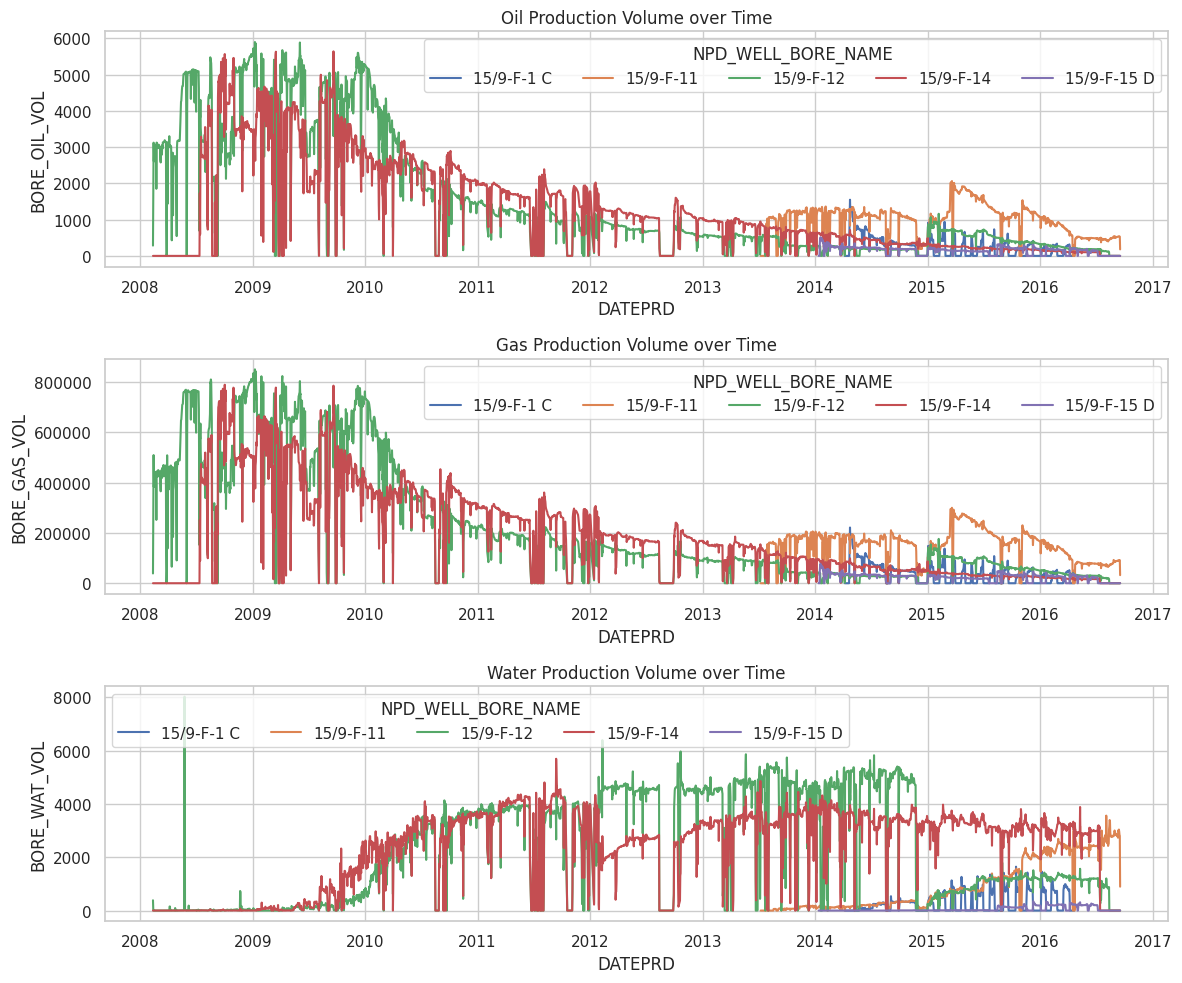

In [16]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# sns.lineplot(data=data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0])
sns.lineplot(data=data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[0].set_title('Oil Production Volume over Time')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('BORE_OIL_VOL')
axes[0].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

# sns.lineplot(data=data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1])
sns.lineplot(data=data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[1].set_title('Gas Production Volume over Time')
axes[1].set_xlabel('DATEPRD')
axes[1].set_ylabel('BORE_GAS_VOL')
axes[1].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

# sns.lineplot(data=data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2])
sns.lineplot(data=data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[2].set_title('Water Production Volume over Time')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('BORE_WAT_VOL')
axes[2].legend(title='NPD_WELL_BORE_NAME', loc='upper left', ncol=5)

plt.tight_layout()
plt.show()

In [17]:
data = data[data['BORE_WAT_VOL'] <= 7000]

In [18]:
columns_to_average = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']
columns_to_sum = ['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']

daily_avg = data.groupby('DATEPRD')[columns_to_average].mean().reset_index() # grouping by DATEPRD and calculating the average of these columns
daily_sum = data.groupby('DATEPRD')[columns_to_sum].sum().reset_index() # grouping by DATEPRD and aggregating the production of oil, gas, and water

field_data = pd.concat([daily_avg, daily_sum], axis=1)
field_data= field_data.loc[:, ~field_data.columns.duplicated()] # to remove duplicate DATEPRD column coming from either daily_avg or daily_sum

field_data

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2008-02-12,5.750000,154.027970,52.209045,100.625000,9.319778,7.242216,53.402970,8.147359,46.266978,284.65,38888.67,385.01
1,2008-02-13,12.000000,151.516759,52.701348,91.072471,8.233321,11.416493,60.444288,26.687165,44.843914,1869.70,285246.16,7.13
2,2008-02-14,11.250000,147.793031,52.887743,90.933943,6.329795,15.624983,56.859087,36.368815,40.084983,3124.09,509954.88,1.16
3,2008-02-15,11.575000,148.831351,52.875938,90.416030,2.632056,14.259465,58.415321,34.997972,42.158695,2608.28,383426.67,0.97
4,2008-02-16,12.000000,147.967759,52.905557,90.250522,6.192347,15.113951,57.717237,35.759174,41.231908,3051.80,418474.00,4.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,2016-09-13,6.000000,149.826548,48.825328,145.795233,13.276425,25.735381,9.467989,20.955164,6.596312,543.81,88042.16,3036.83
3052,2016-09-14,6.000000,149.779171,48.826467,145.759786,13.315494,25.784264,9.457880,21.194998,6.589441,541.88,90188.97,2963.49
3053,2016-09-15,6.000000,149.711370,48.827110,145.706549,13.280454,25.738276,9.446206,20.647362,6.616486,534.87,91890.07,2838.87
3054,2016-09-16,6.000000,149.699779,48.827556,145.701988,13.278240,25.772602,9.437236,20.901993,6.624574,530.27,91579.73,2802.75


## Preparing for Training + Visualization

In [19]:
scaler = MinMaxScaler()

columns = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
columns_to_scale = field_data[columns].copy()
data_scaled = scaler.fit_transform(columns_to_scale)
scaled_data = pd.DataFrame(data_scaled, columns=columns)

scaled_data.insert(0, 'DATEPRD', field_data['DATEPRD'])
# scaled_data.insert(1, 'NPD_WELL_BORE_NAME', data['NPD_WELL_BORE_NAME'])

scaled_data

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2008-02-12,0.230000,0.497229,0.487731,0.327914,0.379730,0.072422,0.433558,0.088548,0.373999,0.030164,0.028509,0.037598
1,2008-02-13,0.480000,0.489123,0.492330,0.296785,0.335463,0.114165,0.490723,0.290046,0.362416,0.198133,0.209112,0.000696
2,2008-02-14,0.450000,0.477102,0.494071,0.296333,0.257904,0.156250,0.461616,0.395269,0.323680,0.331061,0.373844,0.000113
3,2008-02-15,0.463000,0.480454,0.493961,0.294646,0.107242,0.142595,0.474251,0.380371,0.340559,0.276400,0.281087,0.000095
4,2008-02-16,0.480000,0.477666,0.494238,0.294106,0.252304,0.151140,0.468583,0.388644,0.333015,0.323400,0.306780,0.000478
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,2016-09-13,0.240000,0.483666,0.456121,0.475114,0.540941,0.257354,0.076867,0.227748,0.051091,0.057628,0.064543,0.296561
3052,2016-09-14,0.240000,0.483513,0.456131,0.474999,0.542533,0.257843,0.076785,0.230355,0.051035,0.057423,0.066117,0.289399
3053,2016-09-15,0.240000,0.483295,0.456137,0.474825,0.541105,0.257383,0.076690,0.224403,0.051255,0.056680,0.067364,0.277230
3054,2016-09-16,0.240000,0.483257,0.456142,0.474810,0.541015,0.257726,0.076617,0.227170,0.051321,0.056193,0.067136,0.273702


In [20]:
X = scaled_data[['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']]
Y = scaled_data[['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']]

X = X.values
Y = Y.values

In [21]:
def datasplit(X, Y, train_size=0.7, validation_size=0.15, test_size=0.15):

    assert train_size + validation_size + test_size == 1.0

    total_samples = X.shape[0]
    training = int(train_size * total_samples)
    validation = int(validation_size * total_samples)
    test = total_samples - (training + validation)

    X_train = X[:training]
    Y_train = Y[:training]

    X_val = X[training:training+validation]
    Y_val = Y[training:training+validation]

    X_test = X[training+validation:]
    Y_test = Y[training+validation:]

    print(f"X_train shape: {X_train.shape}")
    print(f"Y_train shape: {Y_train.shape}")
    print(f"X_val shape: {X_val.shape}")
    print(f"Y_val shape: {Y_val.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"Y_test shape: {Y_test.shape}")

    return X_train, Y_train, X_val, Y_val, X_test, Y_test

X_train, Y_train, X_val, Y_val, X_test, Y_test = datasplit(X, Y)

X_train shape: (2139, 12)
Y_train shape: (2139, 3)
X_val shape: (458, 12)
Y_val shape: (458, 3)
X_test shape: (459, 12)
Y_test shape: (459, 3)


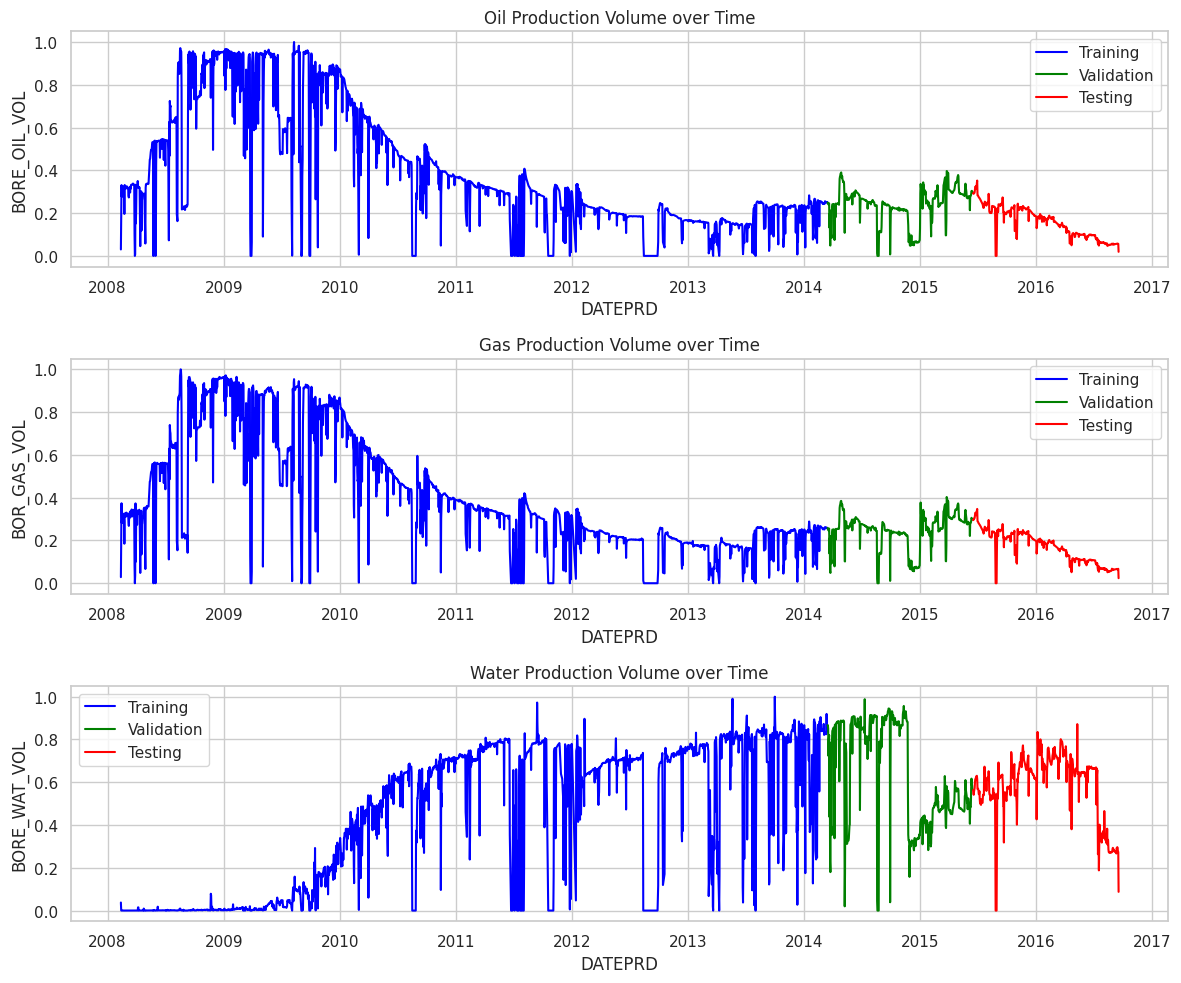

In [22]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.lineplot(data=scaled_data[:Y_train.shape[0]], x='DATEPRD', y=Y_train[:, 0], label='Training', ax=axes[0], color='blue')
sns.lineplot(data=scaled_data[Y_train.shape[0]:Y_train.shape[0] + Y_val.shape[0]], x='DATEPRD', y=Y_val[:, 0], label='Validation', ax=axes[0], color='green')
sns.lineplot(data=scaled_data[Y_train.shape[0] + Y_val.shape[0]:], x='DATEPRD', y=Y_test[:, 0], label='Testing', ax=axes[0], color='red')
axes[0].set_title('Oil Production Volume over Time')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('BORE_OIL_VOL')

sns.lineplot(data=scaled_data[:Y_train.shape[0]], x='DATEPRD', y=Y_train[:, 1], label='Training', ax=axes[1], color='blue')
sns.lineplot(data=scaled_data[Y_train.shape[0]:Y_train.shape[0] + Y_val.shape[0]], x='DATEPRD', y=Y_val[:, 1], label='Validation', ax=axes[1], color='green')
sns.lineplot(data=scaled_data[Y_train.shape[0] + Y_val.shape[0]:], x='DATEPRD', y=Y_test[:, 1], label='Testing', ax=axes[1], color='red')
axes[1].set_title('Gas Production Volume over Time')
axes[1].set_xlabel('DATEPRD')
axes[1].set_ylabel('BOR_GAS_VOL')

sns.lineplot(data=scaled_data[:Y_train.shape[0]], x='DATEPRD', y=Y_train[:, 2], label='Training', ax=axes[2], color='blue')
sns.lineplot(data=scaled_data[Y_train.shape[0]:Y_train.shape[0] + Y_val.shape[0]], x='DATEPRD', y=Y_val[:, 2], label='Validation', ax=axes[2], color='green')
sns.lineplot(data=scaled_data[Y_train.shape[0] + Y_val.shape[0]:], x='DATEPRD', y=Y_test[:, 2], label='Testing', ax=axes[2], color='red')
axes[2].set_title('Water Production Volume over Time')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('BORE_WAT_VOL')

plt.tight_layout()
plt.legend()
plt.show()

## Defining Windowed Version of Data

In [23]:
def windows(features, target, window_size, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((features, target))
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda x, y: tf.data.Dataset.zip((x.batch(window_size + 1), y.batch(window_size + 1))))

    dataset = dataset.map(
        lambda x, y: (
            tf.concat(
                [
                    x[1:, :9], # selecting operational features from t-7 to t
                    x[:-1, 9:] # selecting production features from t-8 to t-1
                    ],
                axis=1),
            y[-1] # selecting target(s) at t
            )
        )

    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

## Defining Windows and Iterator

In [24]:
window_size = 8
batch_size = 64

train_set = windows(X_train, Y_train, window_size, batch_size)
val_set = windows(X_val, Y_val, window_size, batch_size)
test_set = windows(X_test, Y_test, window_size, batch_size)

In [25]:
train_iterator = iter(train_set) # creating an iterator to loop through the dataset
first_element = next(train_iterator) # calling the next  batch from the iterator

In [26]:
features_shape = first_element[0].shape
target_shape = first_element[1].shape

print("Features shape:", features_shape)
print("Target shape:", target_shape)

Features shape: (64, 8, 12)
Target shape: (64, 3)


## Defining Model

The model's architecture was based on a literature review of various research papers (including [Ansari, 2023](https://researchrepository.wvu.edu/etd/11970/?utm_source=researchrepository.wvu.edu%2Fetd%2F11970&utm_medium=PDF&utm_campaign=PDFCoverPages)).

In [29]:
def LSTM_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(288, activation='relu'),
        tf.keras.layers.Dense(units=3, activation = 'sigmoid')
    ])

    return model

## Specifying Training Parameters and Training Model

In [30]:
tf.keras.utils.set_random_seed(50)

model = LSTM_model()

epochs = 1000
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=125, restore_best_weights=True)
learning_rate = 0.001

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.MeanSquaredLogarithmicError()
model.compile(loss = loss, optimizer = optimizer)

history = model.fit(
    train_set,
    epochs = epochs,
    validation_data = val_set,
    shuffle = False,
    callbacks = [early_stopping],
    verbose = 1
)

Epoch 1/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0577 - val_loss: 0.0237
Epoch 2/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0592 - val_loss: 0.0101
Epoch 3/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0510 - val_loss: 0.0131
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0373 - val_loss: 0.0104
Epoch 5/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.0195 - val_loss: 0.0083
Epoch 6/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0167 - val_loss: 0.0091
Epoch 7/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0169 - val_loss: 0.0091
Epoch 8/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0158 - val_loss: 0.0131
Epoch 9/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0165 - val_loss: 0.0127
Epoch 10/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0134 - val_loss: 0.0094
Epoch 11/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0137 - val_loss: 0.0075
Epoch 12/1000
34/34 ━━━━━━━━━━━━━━━━━━━

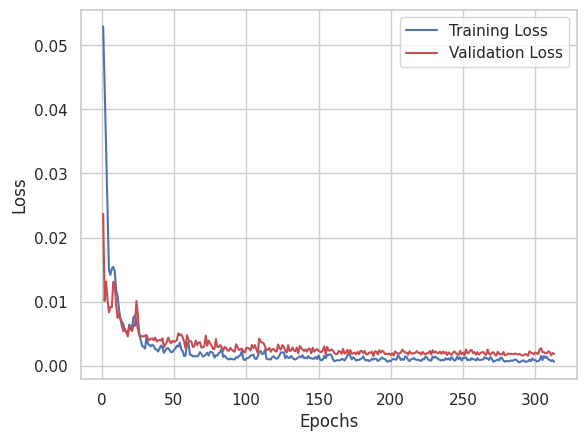

Training MSLE is 0.0005987247568555176
Validation MSLE is 0.0018339884700253606


In [31]:
training_loss = model.history.history['loss']
validation_loss = model.history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

Final_Train_MSLE = training_loss[-1]
print(f"Training MSLE is {Final_Train_MSLE}")
Final_Val_MSLE = validation_loss[-1]
print(f"Validation MSLE is {Final_Val_MSLE}")

## Running Model to Forecast

In [32]:
predictions = model.predict(test_set)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


## Creating Dataset with Actual and Predicted Values + Visualization

In [33]:
for_reverse_scaling = np.hstack([X_test[window_size:, 3:], predictions])
unscaled_data = scaler.inverse_transform(for_reverse_scaling) # unscaling predictions for plotting
final_data = field_data.iloc[-predictions.shape[0]:].copy()

# adding unscaled predictions as new columns at specified positions
final_data.insert(11, 'PREDICTED_OIL', unscaled_data[:, -3])
final_data.insert(13, 'PREDICTED_GAS', unscaled_data[:, -2])
final_data.insert(15, 'PREDICTED_WATER', unscaled_data[:, -1])

final_data

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,PREDICTED_OIL,BORE_GAS_VOL,PREDICTED_GAS,BORE_WAT_VOL,PREDICTED_WATER
2605,2015-06-25,24.000000,182.943582,83.968564,160.327074,13.273079,57.777963,34.455939,70.348237,5.980409,3038.21,3195.596497,447399.00,483553.978684,6313.23,6946.816776
2606,2015-06-26,24.000000,182.578180,83.971705,160.326112,13.140208,58.267437,34.200011,68.385122,5.704992,3078.13,3206.087046,450437.29,485207.374067,6365.02,6974.207898
2607,2015-06-27,24.000000,182.173392,83.983339,159.834192,13.245478,58.711367,34.276776,70.039159,5.488488,3090.54,3241.533077,451443.34,490374.402330,6420.81,7018.350347
2608,2015-06-28,24.000000,183.508896,83.960756,160.537979,13.112158,58.239513,34.923225,69.107932,6.311024,2966.31,3237.848927,433696.32,489631.713922,6421.43,7007.488382
2609,2015-06-29,24.000000,182.425131,83.975119,159.780967,13.139767,59.845231,34.658026,70.787286,5.856151,3228.66,3248.280980,464070.90,491489.390286,6452.86,7096.957989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,2016-09-13,6.000000,149.826548,48.825328,145.795233,13.276425,25.735381,9.467989,20.955164,6.596312,543.81,369.000406,88042.16,59521.608726,3036.83,2181.662517
3052,2016-09-14,6.000000,149.779171,48.826467,145.759786,13.315494,25.784264,9.457880,21.194998,6.589441,541.88,371.984885,90188.97,59997.761269,2963.49,2209.217826
3053,2016-09-15,6.000000,149.711370,48.827110,145.706549,13.280454,25.738276,9.446206,20.647362,6.616486,534.87,369.258930,91890.07,59566.011890,2838.87,2184.053908
3054,2016-09-16,6.000000,149.699779,48.827556,145.701988,13.278240,25.772602,9.437236,20.901993,6.624574,530.27,367.440513,91579.73,59286.949841,2802.75,2147.025661


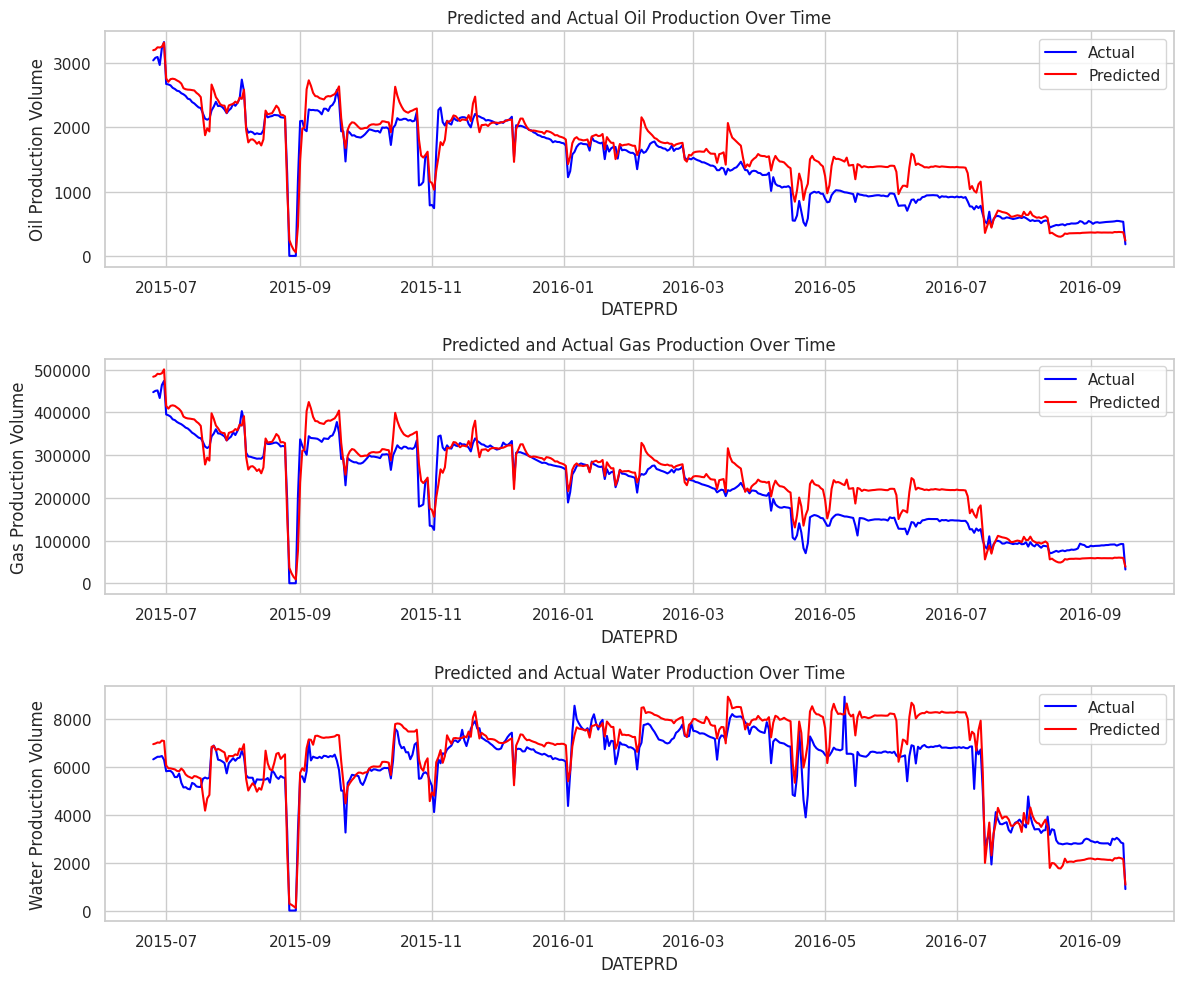

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.lineplot(data=final_data, x='DATEPRD', y='BORE_OIL_VOL', label='Actual', ax=axes[0], color='blue')
sns.lineplot(data=final_data, x='DATEPRD', y='PREDICTED_OIL', label='Predicted', ax=axes[0], color='red')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('Oil Production Volume')
axes[0].set_title('Predicted and Actual Oil Production Over Time')
axes[0].legend()

sns.lineplot(data=final_data, x='DATEPRD', y='BORE_GAS_VOL', label='Actual', ax=axes[1], color='blue')
sns.lineplot(data=final_data, x='DATEPRD', y='PREDICTED_GAS', label='Predicted', ax=axes[1], color='red')
axes[0].set_xlabel('DATEPRD')
axes[1].set_ylabel('Gas Production Volume')
axes[1].set_title('Predicted and Actual Gas Production Over Time')
axes[1].legend()

sns.lineplot(data=final_data, x='DATEPRD', y='BORE_WAT_VOL', label='Actual', ax=axes[2], color='blue')
sns.lineplot(data=final_data, x='DATEPRD', y='PREDICTED_WATER', label='Predicted', ax=axes[2], color='red')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('Water Production Volume')
axes[2].set_title('Predicted and Actual Water Production Over Time')
axes[2].legend()

plt.tight_layout()
plt.show()

The model performs well overall, as predicted productions generally follow the trends of the actual oil, gas, and water production. However, there are discrepancies during periods of sharp changes suggesting that there may be underrepresentation in the training data or insufficient temporal dependencies captured. Therefore, improvements to the model (feature engineering, model refinement, data augmentation, etc.) could help reduce over/underestimation and improve forecasting over periods of sharp changes.

## Saving and Loading Model

In [ ]:
from tensorflow.keras.models import load_model

model.save('LSTM_Model.h5')

model_deploy = load_model('LSTM_Model.h5')

## Cleaning Data of 15/9-F-5 + Visualization

In [ ]:
last_well = all_data[(all_data['NPD_WELL_BORE_NAME'] == '15/9-F-5')][['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL','BORE_GAS_VOL', 'BORE_WAT_VOL']]
last_well

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
15473,2016-04-11,15/9-F-5,0.0,NaN,NaN,NaN,0.00000,0.729358,0.00000,NaN,0.00000,0.0,0.0,0.0
15474,2016-04-12,15/9-F-5,0.0,NaN,NaN,NaN,0.00000,0.718132,0.00000,NaN,0.00000,0.0,0.0,0.0
15475,2016-04-13,15/9-F-5,0.0,NaN,NaN,NaN,4.14780,0.730815,4.67647,NaN,0.00000,0.0,0.0,0.0
15476,2016-04-14,15/9-F-5,0.0,NaN,NaN,NaN,10.44277,0.720336,11.78062,NaN,0.00000,0.0,0.0,0.0
15477,2016-04-15,15/9-F-5,0.0,NaN,NaN,NaN,10.36559,0.776804,11.70474,NaN,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15628,2016-09-13,15/9-F-5,0.0,NaN,NaN,NaN,0.28463,0.673718,0.08545,0.22889,0.03741,0.0,0.0,0.0
15629,2016-09-14,15/9-F-5,0.0,NaN,NaN,NaN,0.27272,0.636088,0.07776,0.22879,0.01862,0.0,0.0,0.0
15630,2016-09-15,15/9-F-5,0.0,NaN,NaN,NaN,0.28686,0.670794,0.08545,0.22914,0.00631,0.0,0.0,0.0
15631,2016-09-16,15/9-F-5,0.0,NaN,NaN,NaN,0.28604,0.664393,0.08544,0.22896,0.01181,0.0,0.0,0.0


In [ ]:
null_values_last_well = last_well.isnull().sum()
null_values_last_well

,0
DATEPRD,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,160
AVG_DOWNHOLE_TEMPERATURE,160
AVG_DP_TUBING,160
AVG_ANNULUS_PRESS,0
AVG_CHOKE_SIZE_P,0
AVG_WHP_P,0
AVG_WHT_P,9


In [ ]:
# filling in missing values in last_well with corresponding values from field_data

filling = pd.merge(last_well, field_data, on='DATEPRD', how='left', suffixes=('', '_field')) # merge last_well and field_data on 'DATEPRD'

for column in last_well.columns:
    if filling[column].isnull().any():
        filling[column] = filling[column].fillna(filling[f'{column}_field'])

last_well_data = filling[last_well.columns] # keeping columns from last_well only

last_well = last_well.sort_values(by = ['NPD_WELL_BORE_NAME', 'DATEPRD'])
last_well_data

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2016-04-11,15/9-F-5,0.0,197.596886,82.804526,185.030818,0.00000,0.729358,0.00000,60.116845,0.00000,0.0,0.0,0.0
1,2016-04-12,15/9-F-5,0.0,197.091709,82.731648,184.816296,0.00000,0.718132,0.00000,60.977488,0.00000,0.0,0.0,0.0
2,2016-04-13,15/9-F-5,0.0,197.493556,82.685397,185.040909,4.14780,0.730815,4.67647,61.147503,0.00000,0.0,0.0,0.0
3,2016-04-14,15/9-F-5,0.0,198.130503,82.654304,185.386334,10.44277,0.720336,11.78062,61.928728,0.00000,0.0,0.0,0.0
4,2016-04-15,15/9-F-5,0.0,198.914057,82.627147,185.972161,10.36559,0.776804,11.70474,61.228526,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2016-09-13,15/9-F-5,0.0,149.826548,48.825328,145.795233,0.28463,0.673718,0.08545,0.228890,0.03741,0.0,0.0,0.0
156,2016-09-14,15/9-F-5,0.0,149.779171,48.826467,145.759786,0.27272,0.636088,0.07776,0.228790,0.01862,0.0,0.0,0.0
157,2016-09-15,15/9-F-5,0.0,149.711370,48.827110,145.706549,0.28686,0.670794,0.08545,0.229140,0.00631,0.0,0.0,0.0
158,2016-09-16,15/9-F-5,0.0,149.699779,48.827556,145.701988,0.28604,0.664393,0.08544,0.228960,0.01181,0.0,0.0,0.0


In [ ]:
null_values_last_well = last_well_data.isnull().sum()
null_values_last_well

,0
DATEPRD,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,0
AVG_DOWNHOLE_TEMPERATURE,0
AVG_DP_TUBING,0
AVG_ANNULUS_PRESS,0
AVG_CHOKE_SIZE_P,0
AVG_WHP_P,0
AVG_WHT_P,0


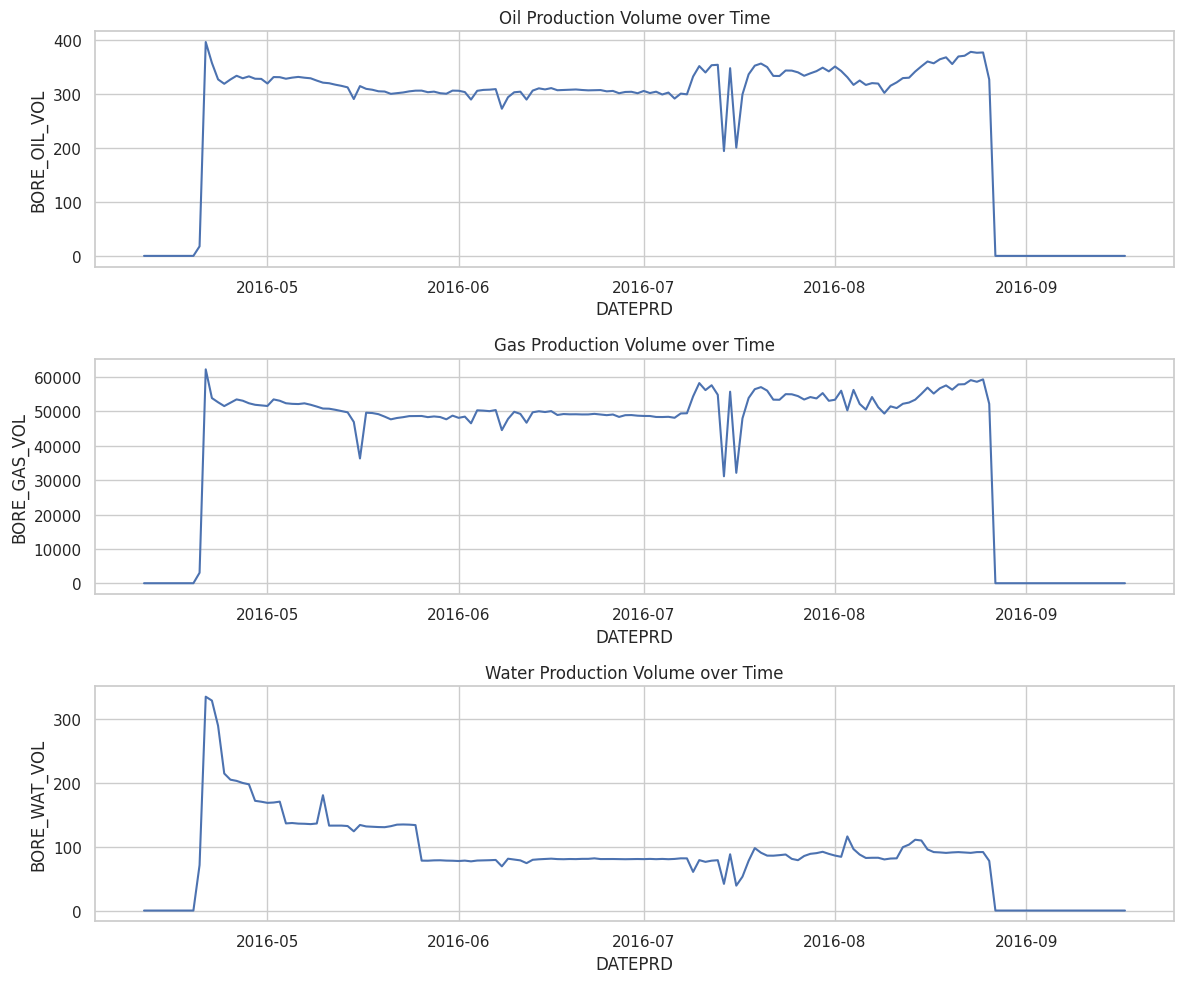

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.lineplot(data=last_well_data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[0].set_title('Oil Production Volume over Time')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('BORE_OIL_VOL')
# axes[0].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

sns.lineplot(data=last_well_data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[1].set_title('Gas Production Volume over Time')
axes[1].set_xlabel('DATEPRD')
axes[1].set_ylabel('BORE_GAS_VOL')
# axes[1].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

sns.lineplot(data=last_well_data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[2].set_title('Water Production Volume over Time')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('BORE_WAT_VOL')
# axes[2].legend(title='NPD_WELL_BORE_NAME', loc='upper left', ncol=5)

plt.tight_layout()
plt.show()

In [ ]:
# F5_data = last_well_data # keeping all data (including 0s at tail ends) and renaming for consistency

# last_well_data.head(30)
# last_well_data.tail(30)

F5_data = last_well_data[(last_well_data['DATEPRD'] > '2016-04-18') & (last_well_data['DATEPRD'] < '2016-08-28')] # removing tail ends due to 0s
F5_data

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
8,2016-04-19,15/9-F-5,0.00000,207.928007,82.358464,194.357797,10.396730,0.745271,11.736450,60.913099,0.000000,0.00,0.00,0.00
9,2016-04-20,15/9-F-5,5.84167,207.520074,82.340175,192.356508,14.578669,16.665578,12.231850,21.797570,1.505540,17.75,3048.80,71.05
10,2016-04-21,15/9-F-5,24.00000,156.108849,61.964591,144.387096,25.363551,80.414591,26.122884,54.168559,0.622656,396.80,62250.56,334.07
11,2016-04-22,15/9-F-5,24.00000,197.406380,77.361517,176.231753,28.703051,79.400186,26.003136,57.744172,0.559027,358.12,53895.45,327.99
12,2016-04-23,15/9-F-5,24.00000,194.822174,77.520316,171.977557,29.454258,79.459730,26.028061,57.133325,0.571334,327.46,52669.63,288.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2016-08-23,15/9-F-5,24.00000,149.332812,48.760886,145.249542,25.073654,100.000000,23.728094,56.861513,0.190029,378.55,59119.57,90.11
135,2016-08-24,15/9-F-5,24.00000,149.308124,48.762768,145.220458,24.933768,100.000000,23.703260,56.248741,0.167719,376.86,58632.31,91.32
136,2016-08-25,15/9-F-5,24.00000,149.284389,48.764552,145.203307,24.930640,100.000000,23.641755,57.883541,0.102264,377.44,59337.43,91.38
137,2016-08-26,15/9-F-5,20.59167,149.246452,48.766429,145.169658,24.828273,83.876813,23.970309,55.871967,0.420182,327.16,52209.60,77.52


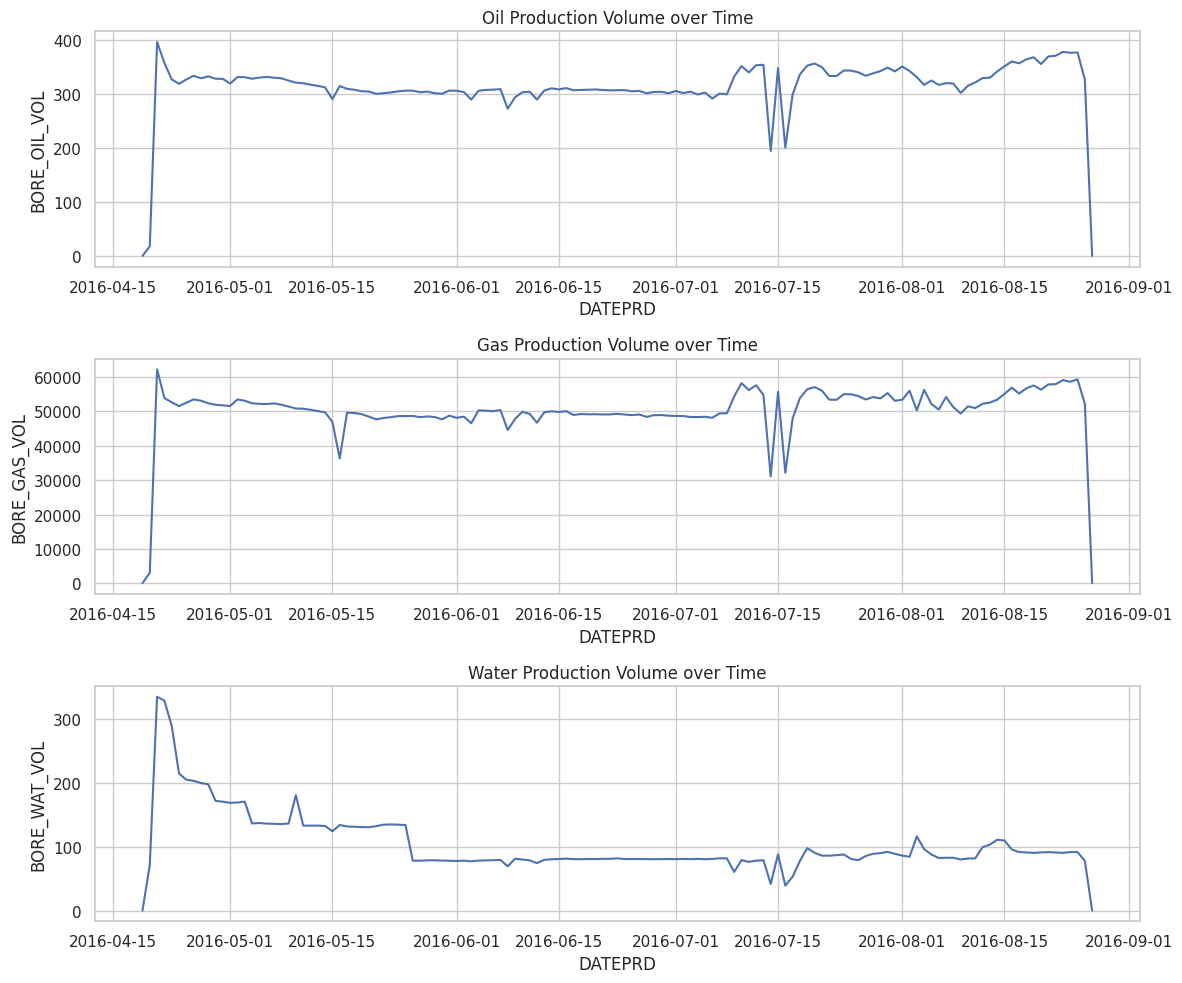

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.lineplot(data=F5_data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[0].set_title('Oil Production Volume over Time')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('BORE_OIL_VOL')
# axes[0].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

sns.lineplot(data=F5_data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[1].set_title('Gas Production Volume over Time')
axes[1].set_xlabel('DATEPRD')
axes[1].set_ylabel('BORE_GAS_VOL')
# axes[1].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

sns.lineplot(data=F5_data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[2].set_title('Water Production Volume over Time')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('BORE_WAT_VOL')
# axes[2].legend(title='NPD_WELL_BORE_NAME', loc='upper left', ncol=5)

plt.tight_layout()
plt.show()

In [ ]:
F5_data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
DATEPRD,131,2016-06-23 00:00:00,2016-04-19 00:00:00,2016-05-21 12:00:00,2016-06-23 00:00:00,2016-07-25 12:00:00,2016-08-27 00:00:00,NaN
ON_STREAM_HRS,131.0,22.697138,0.0,24.0,24.0,24.0,24.0,4.325459
AVG_DOWNHOLE_PRESSURE,131.0,183.669427,149.092983,179.040523,181.259282,191.598155,232.870985,22.986377
AVG_DOWNHOLE_TEMPERATURE,131.0,70.941609,48.725037,73.244394,77.693286,77.877366,82.358464,11.489249
AVG_DP_TUBING,131.0,173.215181,144.387096,165.927048,167.578161,173.526712,225.801894,21.860527
AVG_ANNULUS_PRESS,131.0,21.251062,10.39673,19.842749,20.539254,23.410586,29.454258,2.541322
AVG_CHOKE_SIZE_P,131.0,83.938887,0.745271,79.451793,80.276079,100.0,100.0,14.840248
AVG_WHP_P,131.0,24.345009,11.73645,23.684236,25.598881,25.734455,28.251582,2.482674
AVG_WHT_P,131.0,49.790296,21.79757,46.972582,49.228766,53.165747,60.913099,5.085966
DP_CHOKE_SIZE,131.0,0.388911,0.0,0.16608,0.23153,0.328681,7.62027,0.789739


In [ ]:
F5_scaler = MinMaxScaler()

columns2 = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']
columns_to_scale2 = F5_data[columns2].copy()
F5_scaled = F5_scaler.fit_transform(columns_to_scale2)
scaled_F5 = pd.DataFrame(F5_scaled, columns=columns2)

# scaled_F5.insert(0, 'DATEPRD', field_data['DATEPRD'])
# scaled_data.insert(1, 'NPD_WELL_BORE_NAME', data['NPD_WELL_BORE_NAME'])

scaled_F5

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,0.000000,0.702273,1.000000,0.613779,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,0.243403,0.697404,0.999456,0.589198,0.219438,0.160398,0.029997,0.000000,0.197570,0.044733,0.048976,0.212680
2,1.000000,0.083744,0.393643,0.000000,0.785350,0.802675,0.871106,0.827574,0.081710,1.000000,1.000000,1.000000
3,1.000000,0.576684,0.851429,0.391141,0.960582,0.792455,0.863855,0.918985,0.073360,0.902520,0.865783,0.981800
4,1.000000,0.545838,0.856151,0.338888,1.000000,0.793055,0.865365,0.903369,0.074976,0.825252,0.846091,0.864100
...,...,...,...,...,...,...,...,...,...,...,...,...
126,1.000000,0.002863,0.001066,0.010593,0.770138,1.000000,0.726100,0.896420,0.024937,0.954007,0.949703,0.269734
127,1.000000,0.002568,0.001122,0.010236,0.762798,1.000000,0.724597,0.880754,0.022010,0.949748,0.941876,0.273356
128,1.000000,0.002285,0.001175,0.010025,0.762634,1.000000,0.720873,0.922548,0.013420,0.951210,0.953203,0.273535
129,0.857986,0.001832,0.001231,0.009612,0.757262,0.837557,0.740767,0.871122,0.055140,0.824496,0.838701,0.232047


In [ ]:
X5 = scaled_F5[['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']]
Y5 = scaled_F5[['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']]

X5 = X5.values
Y5 = Y5.values

## Running Loaded Model + Visualization

In [ ]:
F5 = windows(X5, Y5, window_size, batch_size) # creating dataset for F5
F5_set = tf.concat([x[0] for x in F5], axis=0) # converting dataset to tensor

In [ ]:
# F5_set = windows(X5, Y5, window_size, batch_size)
# F5_predictions = model.predict(F5_set)

F5_predictions = model_deploy(F5_set, training = False)

In [ ]:
F5_reverse_scaling = np.hstack([X5[window_size:, 3:], F5_predictions])
F5_unscaled_data = F5_scaler.inverse_transform(F5_reverse_scaling) # unscaling F5 predictions for plotting
F5_final_data = F5_data.iloc[-F5_predictions.shape[0]:].copy()

# adding unscaled F5 predictions as new columns at specified positions
F5_final_data.insert(11, 'PREDICTED_OIL', F5_unscaled_data[:, -3])
F5_final_data.insert(13, 'PREDICTED_GAS', F5_unscaled_data[:, -2])
F5_final_data.insert(15, 'PREDICTED_WATER', F5_unscaled_data[:, -1])

F5_final_data

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,PREDICTED_OIL,BORE_OIL_VOL,PREDICTED_GAS,BORE_GAS_VOL,PREDICTED_WATER,BORE_WAT_VOL
16,2016-04-27,15/9-F-5,24.00000,186.592268,77.714246,171.470829,19.345982,79.417800,25.817589,55.293113,0.307986,319.880233,329.53,48928.647868,53123.38,159.764576,199.28
17,2016-04-28,15/9-F-5,24.00000,186.092220,77.728142,171.073887,18.969732,79.516568,25.882272,52.107196,0.421883,328.642383,333.07,50242.293276,52382.59,147.249836,197.20
18,2016-04-29,15/9-F-5,24.00000,186.151332,77.725098,171.166430,18.469353,79.533727,25.848406,50.649594,0.388172,348.112247,328.68,53308.634679,51937.64,129.411640,171.42
19,2016-04-30,15/9-F-5,24.00000,186.743939,77.714896,171.745452,18.334317,79.462247,25.760933,51.360510,0.300967,346.985319,328.41,53120.371551,51748.70,123.491656,170.01
20,2016-05-01,15/9-F-5,24.00000,187.810415,77.693286,172.867195,18.045696,79.491836,25.989949,45.224000,0.532619,342.432430,319.83,52281.778958,51587.69,108.098569,168.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2016-08-23,15/9-F-5,24.00000,149.332812,48.760886,145.249542,25.073654,100.000000,23.728094,56.861513,0.190029,381.594480,378.55,58940.892799,59119.57,94.921024,90.11
135,2016-08-24,15/9-F-5,24.00000,149.308124,48.762768,145.220458,24.933768,100.000000,23.703260,56.248741,0.167719,383.356512,376.86,59292.663116,58632.31,94.999189,91.32
136,2016-08-25,15/9-F-5,24.00000,149.284389,48.764552,145.203307,24.930640,100.000000,23.641755,57.883541,0.102264,383.924754,377.44,59398.673598,59337.43,95.923231,91.38
137,2016-08-26,15/9-F-5,20.59167,149.246452,48.766429,145.169658,24.828273,83.876813,23.970309,55.871967,0.420182,360.067512,327.16,54406.418836,52209.60,37.930256,77.52


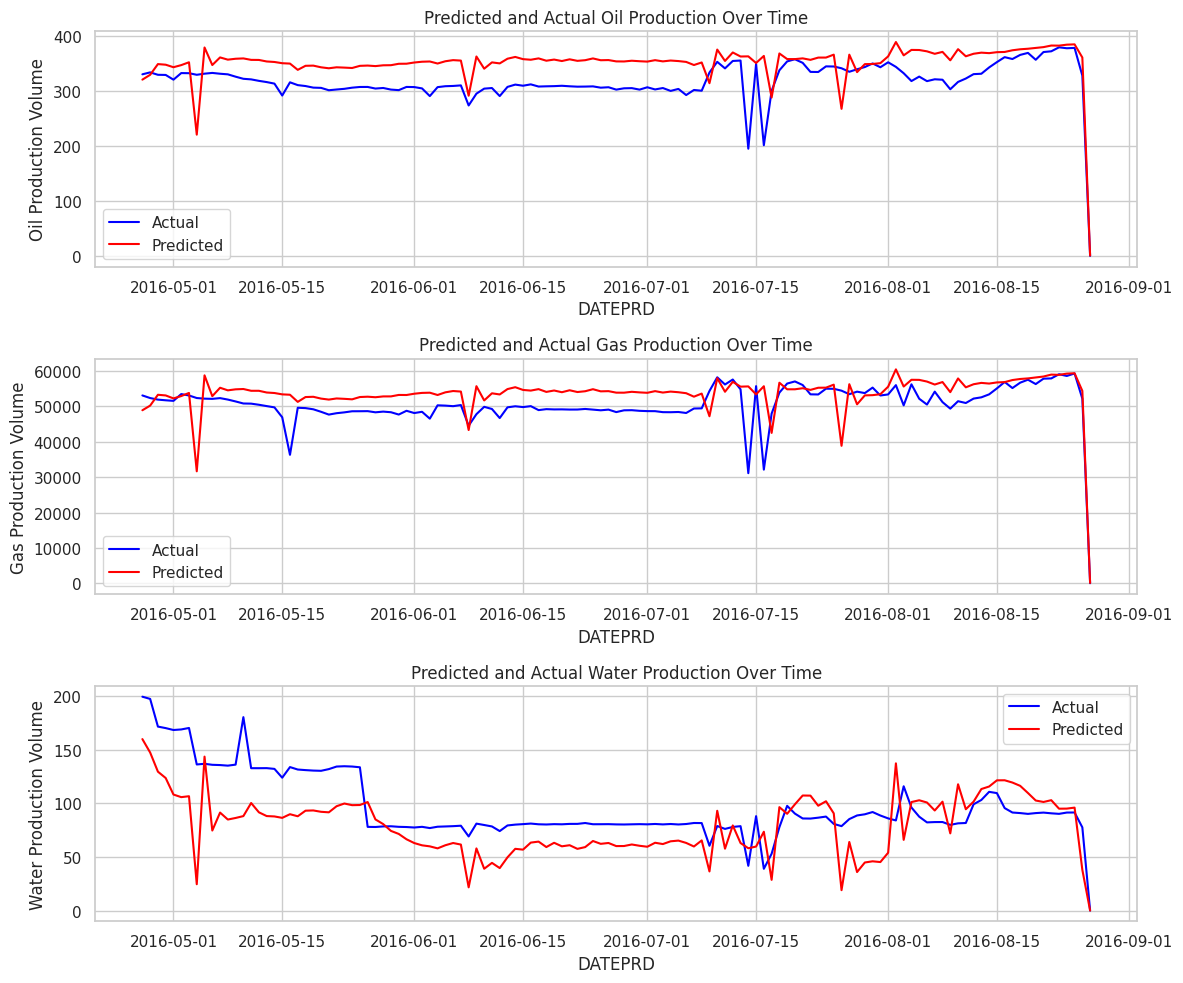

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.lineplot(data=F5_final_data, x='DATEPRD', y='BORE_OIL_VOL', label='Actual', ax=axes[0], color='blue')
sns.lineplot(data=F5_final_data, x='DATEPRD', y='PREDICTED_OIL', label='Predicted', ax=axes[0], color='red')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('Oil Production Volume')
axes[0].set_title('Predicted and Actual Oil Production Over Time')
axes[0].legend()

sns.lineplot(data=F5_final_data, x='DATEPRD', y='BORE_GAS_VOL', label='Actual', ax=axes[1], color='blue')
sns.lineplot(data=F5_final_data, x='DATEPRD', y='PREDICTED_GAS', label='Predicted', ax=axes[1], color='red')
axes[0].set_xlabel('DATEPRD')
axes[1].set_ylabel('Gas Production Volume')
axes[1].set_title('Predicted and Actual Gas Production Over Time')
axes[1].legend()

sns.lineplot(data=F5_final_data, x='DATEPRD', y='BORE_WAT_VOL', label='Actual', ax=axes[2], color='blue')
sns.lineplot(data=F5_final_data, x='DATEPRD', y='PREDICTED_WATER', label='Predicted', ax=axes[2], color='red')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('Water Production Volume')
axes[2].set_title('Predicted and Actual Water Production Over Time')
axes[2].legend()

plt.tight_layout()
plt.show()

The model's predicted production trends show a slight reduction in adaptability to unseen data, particularly for water production. The predicted production values for oil and gas align with their actual production values during stable periods, but tend to overestimate and struggle during sudden fluctuations. This could be due to an over-reliance on historical trends and/or insufficient temporal dependencies in the model. Improvements to the model suggested earlier should address these issues, and are a focus for a future project.